<a href="https://colab.research.google.com/github/marwabe/Breast-cancer-classification/blob/main/Python%20Materials/Analysis%20-%20Decision%20Tree%20Feature%20Importance%20Last%20Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#setting the enviroment 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, classification_report
from sklearn.model_selection import learning_curve, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#uploading data 
df_processed= pd.read_csv("/Users/francescazanetti/Desktop/Python Materials/data 3.csv", index_col=[0])
df_processed.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_category
id,,,,,,,,,,,,,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [ ]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 non-null float64
symmetry_se             

# Preparation of the data

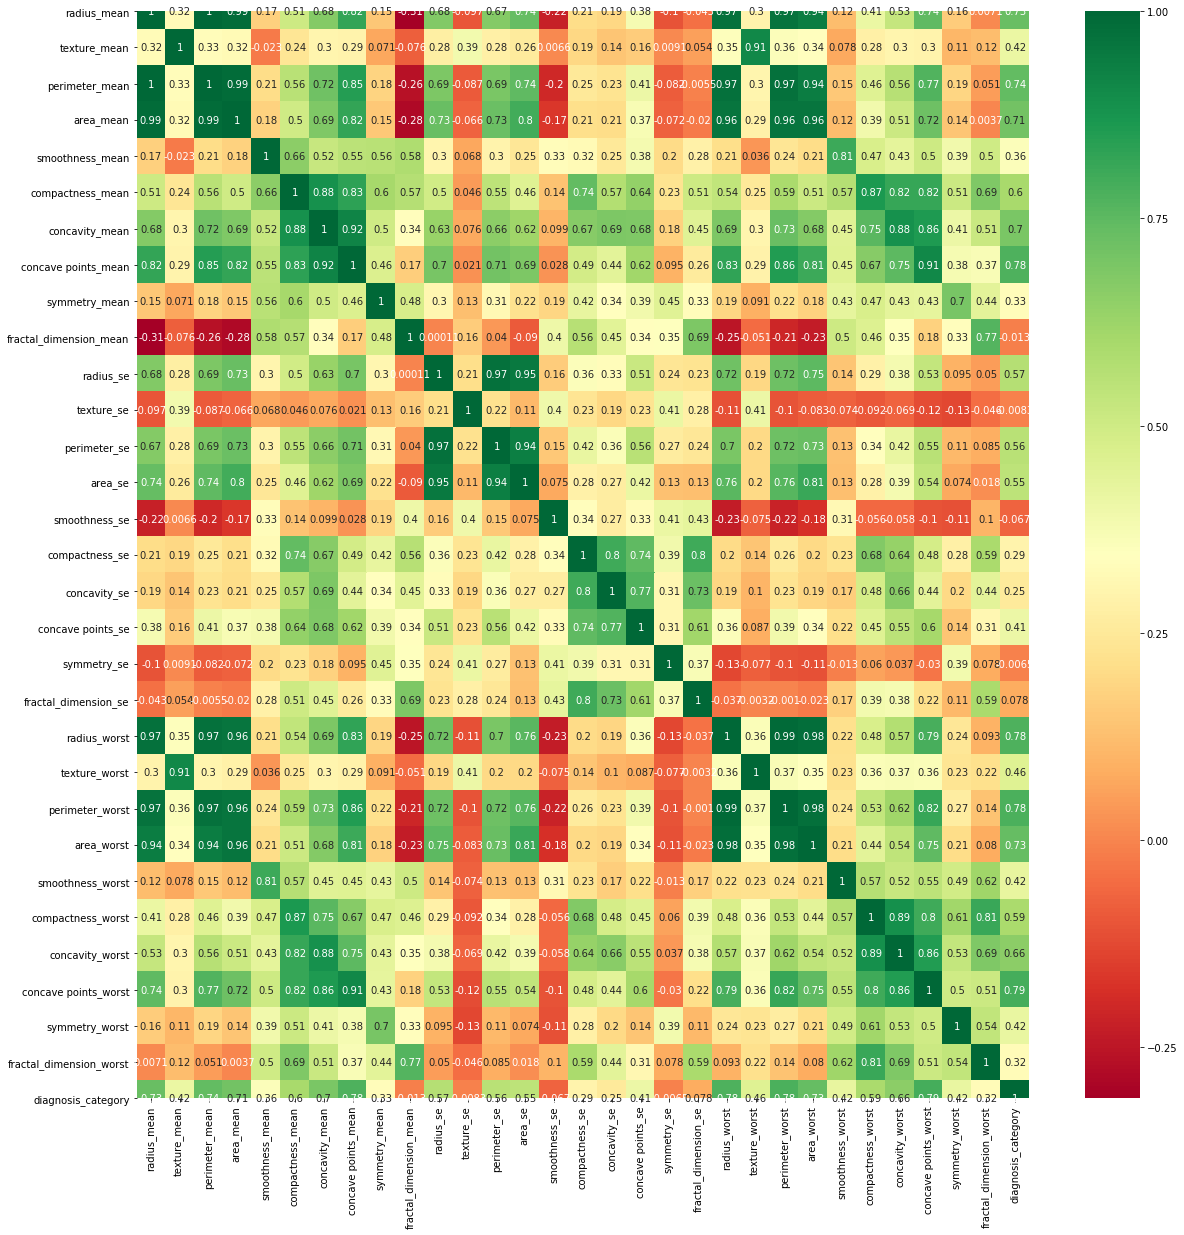

In [ ]:
#getting correlations of each features in dataset
corrmat = df_processed.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plotting heat map
g=sns.heatmap(df_processed[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Decision tree
https://stackabuse.com/decision-trees-in-python-with-scikit-learn/

In [ ]:
#split data into test and train data
X = df_processed.drop('diagnosis_category', axis=1)
y = df_processed['diagnosis_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = classifier.predict_proba(X_test)

In [ ]:
print(f"Decision tree training set accuracy: {format(classifier.score(X_train, y_train), '.4f')} ")
print(f"Decision tree testing set accuracy: {format(classifier.score(X_test, y_test), '.4f')} ")

Decision tree training set accuracy: 1.0000 
Decision tree testing set accuracy: 0.9064 


# Decision Tree Feature Importance 

Finding the most important features by score
https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

In [ ]:
#apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features

                   Specs          Score
23            area_worst  112598.431564
3              area_mean   53991.655924
13               area_se    8758.504705
22       perimeter_worst    3665.035416
2         perimeter_mean    2011.102864
20          radius_worst     491.689157
0            radius_mean     266.104917
12          perimeter_se     250.571896
21         texture_worst     174.449400
1           texture_mean      93.897508
26       concavity_worst      39.516915
10             radius_se      34.675247
6         concavity_mean      19.712354
25     compactness_worst      19.314922
27  concave points_worst      13.485419


In [ ]:
#selecting the 15 best features 
X_test = df_processed.drop(['radius_mean','area_mean','perimeter_worst','area_worst','perimeter_se','perimeter_mean','area_se','texture_mean','concavity_worst','compactness_worst','radius_se'],axis = 1).values
X_train = df_processed.drop(['radius_mean','area_mean','perimeter_worst','area_worst','perimeter_se','perimeter_mean','area_se','texture_mean','concavity_worst','compactness_worst','radius_se'],axis = 1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = classifier.predict_proba(X_test)

In [ ]:
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       105
           1       0.90      0.86      0.88        66

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



In [ ]:
print(confusion_matrix(y_test,predictions))

[[99  6]
 [ 9 57]]


# Random Forest model

In [ ]:
features = pd.get_dummies(df_processed)
feature_list = list(features.columns)


In [ ]:
#training the random forest
beta = RandomForestClassifier()                                            
beta.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predictions = beta.predict(X_test)
probability = beta.predict_proba(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       105
           1       0.97      0.91      0.94        66

    accuracy                           0.95       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
print(confusion_matrix(y_test,predictions))

[[103   2]
 [  6  60]]


# Random forest Graph Representation

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=360)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 10.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

dict_characters = {0: 'Malignant', 1: 'Benign'}

Accuracy of Random Forest Classifier on training data: 0.99
Accuracy of Random Forest Classifier on testing data: 0.97


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


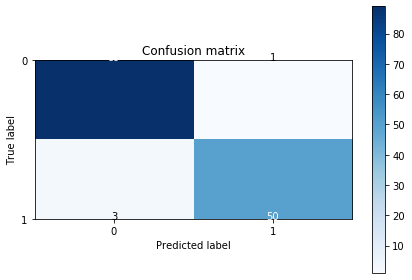

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=0)

clf = RandomForestClassifier(max_features=8,random_state=0)
clf.fit(X_train,Y_train)
print('Accuracy of Random Forest Classifier on training data: {:.2f}'.format(clf.score(X_train,Y_train)))
print('Accuracy of Random Forest Classifier on testing data: {:.2f}'.format(clf.score(X_test,Y_test)))

model = clf
prediction = model.predict(X_test)
cnf_matrix = confusion_matrix(Y_test, prediction)
plt.show()
plot_confusion_matrix(cnf_matrix, classes=dict_characters,title='Confusion matrix')
plt.show()